# Block 5 Exercise 2: Predicting the fare of taxi rides
Using the NY Taxi data set (see Use Case Block I) and the use case from the lecture...

In [22]:
import pandas as pd
import numpy as np
import folium
import matplotlib.pyplot as plt

In [23]:
# we load the data we have saved after wrangling and pre-processing in block I
X=pd.read_csv('../../DATA/train_cleaned.csv')
drop_columns=['Unnamed: 0','Unnamed: 0.1','Unnamed: 0.1.1','key','pickup_datetime','pickup_date','pickup_latitude_round3','pickup_longitude_round3','dropoff_latitude_round3','dropoff_longitude_round3']
X=X.drop(drop_columns,axis=1)
X=pd.get_dummies(X)# one hot coding
#generate labels
y=X['fare_amount']
X=X.drop(['fare_amount'],axis=1)

In [24]:
# a quick look at the data
X.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_day,pickup_hour,pickup_day_of_week,pickup_month,pickup_year,...,pickup_borough_manhattan,pickup_borough_others,pickup_borough_queens,pickup_borough_staten_island,dropoff_borough_bronx,dropoff_borough_brooklyn,dropoff_borough_manhattan,dropoff_borough_others,dropoff_borough_queens,dropoff_borough_staten_island
0,-73.844311,40.721319,-73.841610,40.712278,1,15,17,1,6,2009,...,0,0,1,0,0,0,0,0,1,0
1,-74.016048,40.711303,-73.979268,40.782004,1,5,16,2,1,2010,...,1,0,0,0,0,0,1,0,0,0
2,-73.982738,40.761270,-73.991242,40.750562,2,18,0,4,8,2011,...,1,0,0,0,0,0,1,0,0,0
3,-73.987130,40.733143,-73.991567,40.758092,1,21,4,6,4,2012,...,1,0,0,0,0,0,1,0,0,0
4,-73.968095,40.768008,-73.956655,40.783762,1,9,7,2,3,2010,...,1,0,0,0,0,0,1,0,0,0


In [25]:
y.head()

0     4.5
1    16.9
2     5.7
3     7.7
4     5.3
Name: fare_amount, dtype: float64

### E 2.1 Split data into train and test data
* use data from 2009-1014 for training and 2015 for evaluation


In [26]:
X_train=X[X['pickup_year']<2015]
y_train=y[X['pickup_year']<2015]
X_test=X[X['pickup_year']==2015]
y_test=y[X['pickup_year']==2015]

### E 2.2 Train a Random Forest Regression Model
* train model using [RF regression](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html#sklearn.ensemble.RandomForestRegressor)
* optimize the model parameters (#trees, depth, vars per split, ...) and evaluate the [MSE](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html#sklearn.metrics.mean_squared_error) on train and test data
* Analyze the model error: are there typical settings where the model fails?

In [32]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor(n_estimators=15)
%time
rfr.fit(X_train,y_train)

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 5.01 µs


RandomForestRegressor(n_estimators=15)

In [33]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,rfr.predict(X_test))

22.30070576649536

In [34]:
mean_squared_error(y_train,rfr.predict(X_train))

2.905277168807313

In [44]:
difference=np.abs(y_test-rfr.predict(X_test))
difference_50=difference[difference<=50]

(array([2.569e+04, 1.646e+03, 3.300e+02, 8.700e+01, 3.700e+01, 2.600e+01,
        1.900e+01, 1.300e+01, 1.300e+01, 1.300e+01]),
 array([ 0.        ,  4.80833333,  9.61666667, 14.425     , 19.23333333,
        24.04166667, 28.85      , 33.65833333, 38.46666667, 43.275     ,
        48.08333333]),
 <BarContainer object of 10 artists>)

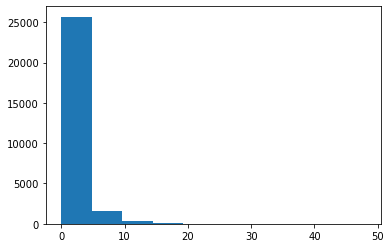

In [45]:
plt.hist(difference_50)

In [38]:
rfr_50=RandomForestRegressor(n_estimators=50)
%time
rfr_50.fit(X_train,y_train)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.25 µs


RandomForestRegressor(n_estimators=50)

In [39]:
mean_squared_error(y_test,rfr_50.predict(X_test))

21.75712499144927

In [40]:
mean_squared_error(y_train,rfr_50.predict(X_train))

2.3975674541151286

(array([2.5961e+04, 1.4380e+03, 2.7400e+02, 9.2000e+01, 3.8000e+01,
        2.0000e+01, 2.3000e+01, 8.0000e+00, 1.1000e+01, 8.0000e+00]),
 array([ 0.    ,  4.9184,  9.8368, 14.7552, 19.6736, 24.592 , 29.5104,
        34.4288, 39.3472, 44.2656, 49.184 ]),
 <BarContainer object of 10 artists>)

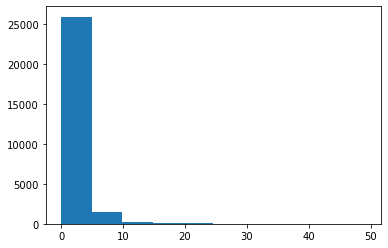

In [46]:
difference_new=np.abs(y_test-rfr_50.predict(X_test))
difference_new_50=difference_new[difference_new<=50]
plt.hist(difference_new_50)